In [1]:
ls

drive/  sample_data/


In [2]:
cd /content/drive/MyDrive/Assignment3

/content/drive/MyDrive/Assignment3


In [3]:
ls

Assignment3.ipynb  flowers/  Flowers-Dataset.zip


IMAGE AUGMENTATION

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

SPLITTING TRAIN AND TEST DATA

In [10]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import splitfolders

In [13]:
input_folder = '/content/drive/MyDrive/Assignment3/flowers'

In [14]:
splitfolders.ratio(input_folder, output ='/content/drive/MyDrive/Assignment3/dataset', seed=42, ratio = (0.8,0,0.2), group_prefix=None )

Copying files: 4317 files [01:25, 50.77 files/s]


CREATING MODEL

In [15]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment3/dataset/train", target_size=(64,64), class_mode="categorical", batch_size=24)

Found 3452 images belonging to 5 classes.


In [16]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment3/dataset/test", target_size=(64,64), class_mode="categorical", batch_size=24)

Found 865 images belonging to 5 classes.


**ADDING LAYERS**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [18]:
model = Sequential()

In [19]:
model.add(Convolution2D(32,(3,3), activation = "relu", input_shape = (64,64,3)))

In [20]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
model.add(Flatten())

In [23]:
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))

In [25]:
model.add(Dense(5, activation="softmax"))

COMPILING THE MODEL

In [26]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [28]:
len(x_train)

144

FITTING THE MODEL

In [ ]:
model.fit(x_train, epochs = 20, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps = len(x_test))

SAVNIG THE MODEL

In [35]:
model.save("flower.h5")

TESTING THE MODEL

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [37]:
model = load_model("/content/drive/MyDrive/Assignment3/flower.h5")

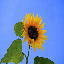

In [58]:
img = image.load_img("/content/drive/MyDrive/Assignment3/dataset/test/sunflower/1044296388_912143e1d4.jpg",target_size=(64,64))
img

In [59]:
x = image.img_to_array(img)

In [60]:
x= np.expand_dims(x,axis=0)

In [61]:
pred = model.predict(x)

1/1 [==============================] - 0s 29ms/step


In [62]:
label = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

In [63]:
label[np.argmax(pred)]

'sunflower'